In [5]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input,SimpleRNN,Flatten
from tensorflow.keras.optimizers import SGD,Adam
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


## make timeseri data

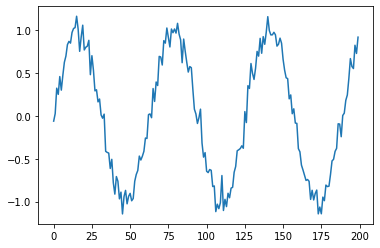

In [6]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

## use T past value to predict outcome

In [14]:
T = 10
x = []
y = []
for index in range(len(series)-T):
    x.append(series[index:index+T])
    y.append(series[index+T])
    
X = np.array(x).reshape(-1, T)
Y = np.array(y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


## autoregressive linear model

In [20]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(optimizer=Adam(0.1),loss="mse")
hist = model.fit(X[:N//2],Y[:N//2],validation_data=(X[-N//2:], Y[-N//2:]),epochs=40)

Epoch 1/40
3/3 [==============================] - 0s 17ms/step - loss: 1.9593 - val_loss: 0.3778
Epoch 2/40
3/3 [==============================] - 0s 9ms/step - loss: 0.7994 - val_loss: 0.9805
Epoch 3/40
3/3 [==============================] - 0s 8ms/step - loss: 0.9391 - val_loss: 0.4499
Epoch 4/40
3/3 [==============================] - 0s 8ms/step - loss: 0.2553 - val_loss: 0.2055
Epoch 5/40
3/3 [==============================] - 0s 9ms/step - loss: 0.2903 - val_loss: 0.3301
Epoch 6/40
3/3 [==============================] - 0s 8ms/step - loss: 0.3455 - val_loss: 0.1411
Epoch 7/40
3/3 [==============================] - 0s 9ms/step - loss: 0.1117 - val_loss: 0.0915
Epoch 8/40
3/3 [==============================] - 0s 9ms/step - loss: 0.1059 - val_loss: 0.1569
Epoch 9/40
3/3 [==============================] - 0s 8ms/step - loss: 0.1402 - val_loss: 0.0785
Epoch 10/40
3/3 [==============================] - 0s 8ms/step - loss: 0.0607 - val_loss: 0.0719
Epoch 11/40
3/3 [=====================

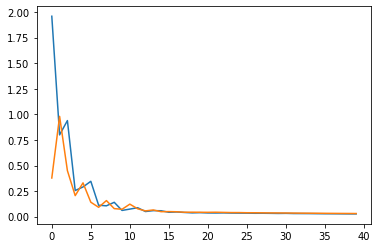

In [22]:
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")

## prediction

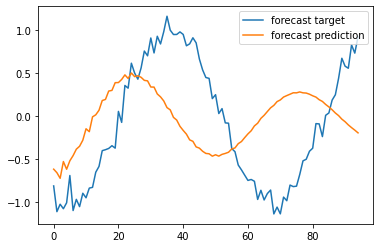

In [30]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
    validation_predictions.append(p)
  
  # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

## simple RNN

In [32]:
i = Input(shape=(T,1))
x = SimpleRNN(15,activation='relu')(i)#default activation func is tanh
x = Dense(1)(x)
model = Model(i,x)
model.compile(optimizer=Adam(0.1),loss="mse")
hist = model.fit(X[:N//2],Y[:N//2],validation_data=(X[-N//2:], Y[-N//2:]),epochs=40)

Epoch 1/40
3/3 [==============================] - 0s 36ms/step - loss: 1.9720 - val_loss: 0.9734
Epoch 2/40
3/3 [==============================] - 0s 10ms/step - loss: 0.6091 - val_loss: 0.7026
Epoch 3/40
3/3 [==============================] - 0s 11ms/step - loss: 0.4367 - val_loss: 0.4962
Epoch 4/40
3/3 [==============================] - 0s 12ms/step - loss: 0.3713 - val_loss: 0.3681
Epoch 5/40
3/3 [==============================] - 0s 11ms/step - loss: 0.2296 - val_loss: 0.2179
Epoch 6/40
3/3 [==============================] - 0s 11ms/step - loss: 0.1436 - val_loss: 0.1033
Epoch 7/40
3/3 [==============================] - 0s 12ms/step - loss: 0.0715 - val_loss: 0.0706
Epoch 8/40
3/3 [==============================] - 0s 32ms/step - loss: 0.0819 - val_loss: 0.0783
Epoch 9/40
3/3 [==============================] - 0s 10ms/step - loss: 0.0679 - val_loss: 0.0657
Epoch 10/40
3/3 [==============================] - 0s 11ms/step - loss: 0.0483 - val_loss: 0.0376
Epoch 11/40
3/3 [============

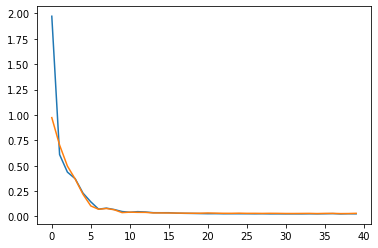

In [33]:
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")

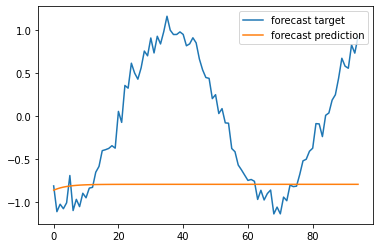

In [34]:
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
    validation_predictions.append(p)
  
  # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
    
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [35]:

# N = number of samples
# T = sequence length
# D = number of input features
# M = number of hidden units
# K = number of output units
N = 1
T = 10
D = 3
K = 2
X = np.random.randn(N, T, D)
M = 5 # number of hidden units
i = Input(shape=(T, D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)

model = Model(i, x)
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 10, 3)]           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 5)                 45        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 12        
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
